<a href="https://colab.research.google.com/github/Ritveekaggarwal/cc/blob/main/10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 10 (NLP 2)
Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports, technology, food, books, etc.).

Convert text to lowercase and remove punctuaƟon using re.
Tokenize the text into words and sentences.
Split using split() and word_tokenize() and compare how Python split and NLTK’s word_tokenize() differ.
Remove stopwords (using NLTK's stopwords list).
Display word frequency distribuƟon (excluding stopwords).

In [2]:
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' resource

# Step 1: Write a paragraph about a favorite topic
text = "Technology has revolutionized the way we live, work, and communicate. From smartphones to artificial intelligence, advancements in technology have made our lives more convenient and efficient. However, it also raises concerns about privacy and dependency. The rapid pace of innovation continues to shape our future in unimaginable ways."

# Convert text to lowercase and remove punctuation
text_cleaned = re.sub(r'[^a-zA-Z]', '', text.lower())

# Tokenize the text into words and sentences
words = word_tokenize(text_cleaned)
sentences = sent_tokenize(text)

# Split using split() and word_tokenize()
words_split = text_cleaned.split()

# Compare split() and word_tokenize()
print("Words using split():", words_split)
print("Words using word_tokenize():", words)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Display word frequency distribution (excluding stopwords)
word_freq = Counter(filtered_words)
print("Word Frequency Distribution:", word_freq)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Words using split(): ['technologyhasrevolutionizedthewayweliveworkandcommunicatefromsmartphonestoartificialintelligenceadvancementsintechnologyhavemadeourlivesmoreconvenientandefficienthoweveritalsoraisesconcernsaboutprivacyanddependencytherapidpaceofinnovationcontinuestoshapeourfutureinunimaginableways']
Words using word_tokenize(): ['technologyhasrevolutionizedthewayweliveworkandcommunicatefromsmartphonestoartificialintelligenceadvancementsintechnologyhavemadeourlivesmoreconvenientandefficienthoweveritalsoraisesconcernsaboutprivacyanddependencytherapidpaceofinnovationcontinuestoshapeourfutureinunimaginableways']
Word Frequency Distribution: Counter({'technologyhasrevolutionizedthewayweliveworkandcommunicatefromsmartphonestoartificialintelligenceadvancementsintechnologyhavemadeourlivesmoreconvenientandefficienthoweveritalsoraisesconcernsaboutprivacyanddependencytherapidpaceofinnovationcontinuestoshapeourfutureinunimaginableways': 1})


Q2. Using the same paragraph from Q1:

Extract all words with only alphabets using re.findall()
Remove stop words using NLTK’s stopword list
Perform stemming with PorterStemmer
Perform lemmaƟzaƟon with WordNetLemmaƟzer
Compare the stemmed and lemmaƟzed outputs and explain when you’d prefer one over the other.

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

paragraph = "Apple unveils new iPhone with better camera and battery life. The movie had stunning visuals but a weak storyline. This laptop is lightweight, powerful and has a long battery backup."

words = re.findall(r'\b[a-zA-Z]+\b', paragraph)

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in filtered_words]

print("Original Words (no stopwords):", filtered_words)
print("Stemmed Words:", stemmed_words)
print("Lemmatized Words:", lemmatized_words)

print("\nComparison:")
for s, l in zip(stemmed_words, lemmatized_words):
    print(f"Stem: {s.ljust(15)} | Lemma: {l}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Original Words (no stopwords): ['Apple', 'unveils', 'new', 'iPhone', 'better', 'camera', 'battery', 'life', 'movie', 'stunning', 'visuals', 'weak', 'storyline', 'laptop', 'lightweight', 'powerful', 'long', 'battery', 'backup']
Stemmed Words: ['appl', 'unveil', 'new', 'iphon', 'better', 'camera', 'batteri', 'life', 'movi', 'stun', 'visual', 'weak', 'storylin', 'laptop', 'lightweight', 'power', 'long', 'batteri', 'backup']
Lemmatized Words: ['apple', 'unveils', 'new', 'iphone', 'better', 'camera', 'battery', 'life', 'movie', 'stunning', 'visuals', 'weak', 'storyline', 'laptop', 'lightweight', 'powerful', 'long', 'battery', 'backup']

Comparison:
Stem: appl            | Lemma: apple
Stem: unveil          | Lemma: unveils
Stem: new             | Lemma: new
Stem: iphon           | Lemma: iphone
Stem: better          | Lemma: better
Stem: camera          | Lemma: camera
Stem: batteri         | Lemma: battery
Stem: life            | Lemma: life
Stem: movi            | Lemma: movie
Stem: stun 

Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).

Use CountVectorizer to generate the Bag of Words representaƟon.
Use TfidfVectorizer to compute TF-IDF scores.
Print and interpret the top 3 keywords from each text using TF-IDF.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

texts = [
    "Apple unveils new iPhone with better camera and battery life",
    "The movie had stunning visuals but a weak storyline",
    "This laptop is lightweight, powerful and has a long battery backup"
]

count_vect = CountVectorizer()
bow_matrix = count_vect.fit_transform(texts)
print("Bag of Words Matrix:\n", bow_matrix.toarray())

tfidf_vect = TfidfVectorizer()
tfidf_matrix = tfidf_vect.fit_transform(texts)
feature_names = tfidf_vect.get_feature_names_out()

def get_top_keywords(tfidf_row, features, top_n=3):
    sorted_indices = np.argsort(tfidf_row.toarray()[0])[::-1]
    return [(features[i], tfidf_row[0, i]) for i in sorted_indices[:top_n]]

print("\nTop 3 Keywords per Text (using TF-IDF):\n")
for i, text in enumerate(texts):
    tfidf_row = tfidf_matrix[i]
    top_keywords = get_top_keywords(tfidf_row, feature_names)
    print(f"Text {i+1}: {text}")
    for word, score in top_keywords:
        print(f"  {word}: {score:.3f}")
    print()


Bag of Words Matrix:
 [[1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0]
 [1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0]]

Top 3 Keywords per Text (using TF-IDF):

Text 1: Apple unveils new iPhone with better camera and battery life
  with: 0.330
  unveils: 0.330
  new: 0.330

Text 2: The movie had stunning visuals but a weak storyline
  weak: 0.354
  visuals: 0.354
  storyline: 0.354

Text 3: This laptop is lightweight, powerful and has a long battery backup
  powerful: 0.330
  this: 0.330
  laptop: 0.330



Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs Blockchain).

Preprocess and tokenize both texts.
Calculate: a. Jaccard Similarity using sets b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
c. Analyze which similarity metric gives beƩer insights in your case.

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')
nltk.download('stopwords')

text1 = """Artificial Intelligence is a branch of computer science focused on building smart machines.
AI can simulate human intelligence processes like learning and reasoning.
It powers applications like chatbots, recommendation systems, and autonomous vehicles."""

text2 = """Blockchain is a distributed ledger technology used to record transactions securely.
It enables decentralization and transparency across systems.
Blockchain supports cryptocurrencies and smart contracts."""

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

set1 = set(tokens1)
set2 = set(tokens2)
jaccard = len(set1 & set2) / len(set1 | set2)

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform([text1, text2])
cos_sim = cosine_similarity(tfidf[0:1], tfidf[1:2])[0][0]

print("Jaccard Similarity:", jaccard)
print("Cosine Similarity:", cos_sim)

if cos_sim > jaccard:
    print("Cosine Similarity captures more nuanced similarities due to term weighting.")
else:
    print("Jaccard is simpler and better when exact overlap matters.")


Jaccard Similarity: 0.05263157894736842
Cosine Similarity: 0.14456281266234103
Cosine Similarity captures more nuanced similarities due to term weighting.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Q5. Write a short review for a product or service.

Use TextBlob or VADER to find polarity & subjecƟvity for each review.
Classify reviews into PosiƟve / NegaƟve / Neutral.
Create a word cloud using the wordcloud library for all posiƟve reviews

Review: This phone has an amazing battery life and the camera quality is superb.
Polarity: 0.80, Sentiment: Positive

Review: Terrible customer service. I had to wait for 30 minutes to talk to an agent.
Polarity: -1.00, Sentiment: Negative

Review: The packaging was okay, nothing impressive but it did the job.
Polarity: 0.75, Sentiment: Positive

Review: Absolutely love this laptop! Fast, sleek, and worth every penny.
Polarity: 0.38, Sentiment: Positive

Review: Not satisfied with the product. It stopped working after a week.
Polarity: -0.25, Sentiment: Negative



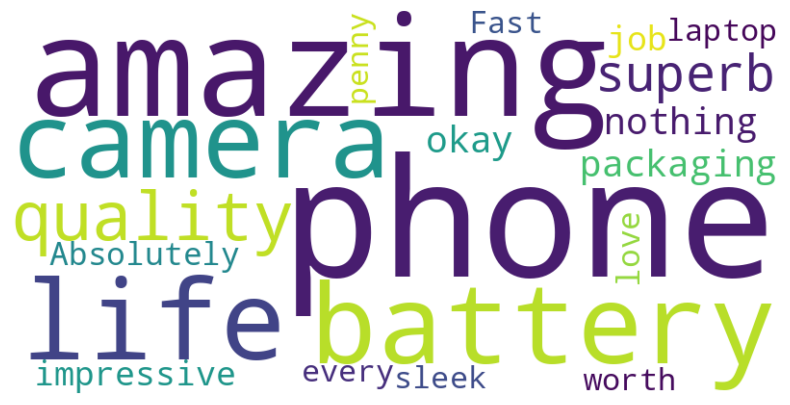

In [6]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "This phone has an amazing battery life and the camera quality is superb.",
    "Terrible customer service. I had to wait for 30 minutes to talk to an agent.",
    "The packaging was okay, nothing impressive but it did the job.",
    "Absolutely love this laptop! Fast, sleek, and worth every penny.",
    "Not satisfied with the product. It stopped working after a week."
]

positive_reviews = []

for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        sentiment = "Positive"
        positive_reviews.append(review)
    elif polarity < -0.1:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    print(f"Review: {review}")
    print(f"Polarity: {polarity:.2f}, Sentiment: {sentiment}\n")

positive_text = " ".join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Q6. Choose your own paragraph (~100 words) as training data.

Tokenize text using Tokenizer() from keras.preprocessing.text
Create input sequences and build a simple LSTM or Dense model
Train the model and generate 2–3 new lines of text starƟng from any seed word you provide.

In [7]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

paragraph = """Artificial Intelligence is transforming industries by automating tasks and providing insights.
It powers applications like chatbots, recommendation systems, and autonomous vehicles.
The future of AI holds immense potential for innovation and efficiency."""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in paragraph.split('.'):
    if line.strip():  # Skip empty lines
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)

# Pad sequences and create predictors and labels
max_sequence_len = max([len(x) for x in input_sequences]) if input_sequences else 0
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = np.array(y)

# Step 2: Build the LSTM model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=1)

# Step 3: Generate new text
seed_text = "Artificial Intelligence"
next_words = 3

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print("Generated Text:", seed_text)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 3.4354
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0345 - loss: 3.4328
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1034 - loss: 3.4303
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1034 - loss: 3.4277
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1034 - loss: 3.4249
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.1034 - loss: 3.4220
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1034 - loss: 3.4188
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1034 - loss: 3.4153
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1034 - loss: 3.4113
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1034 - loss: 3.4067
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1034 - loss: 3.4016
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1034 - loss: 3.395